Notebook referente a estudo de caso desenvolvido no decorrer de treinamento ofertado pela mesttra (Academia QADS).


---


O notebook tem objetivo do desenvolvimento de um modelo preditivo para excesso de bagagem utilizando dados disponibilizados pela Agência Nacional de Aviação Civil (ANAC).






# Grupo 02

*   Gabriela Pessoa
*   Larissa Cunha
*   Mike Xavier
*   Vinicius Waltrick
*   Victor Rocha Grecco
*   Rafael Henrique Martello

## Bibliotecas:

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 411 kB/s 


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split

from sklearn.preprocessing import OneHotEncoder

## Modelos:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Modelos classificação:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegressionCV ## crossval
from sklearn.linear_model import RidgeClassifierCV

## Não linear
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC

## Ensemble

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBRegressor, XGBClassifier

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [ ]:
import timeit
from scipy.stats import pearsonr
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Funções:

In [ ]:
# prepare a list of ml models
def get_models(models=dict(), metodo='Regressao'):
	'''
	Função que instancia os modelos 

	metodo:
	1) Regressao
	2) classificacao

	modelos:
	1) Lineares
	2) Nao_Lineares
	3) Ensemble

	Input: models -> cria dicinário para modelos
		   metodo -> define o tipo de metodo a ser avaliado 
		   modelos -> define o tipo de metodos

	Output:
	'''
	if metodo =='Regressao':
			# linear models
			models['lr'] = LinearRegression()
			models['lasso'] = Lasso()
			models['ridge'] = Ridge()
			models['en'] = ElasticNet()
			models['huber'] = HuberRegressor()
			models['pa'] = PassiveAggressiveRegressor(max_iter=1000, tol=1e-3)
			models['sgd'] = SGDRegressor(max_iter=1000, tol=1e-3)

			# # ensemble models
			n_trees = 50
			models['ada'] = AdaBoostRegressor(n_estimators=n_trees)
			models['rf'] = RandomForestRegressor(n_estimators=n_trees)
			print('Defined %d models' % len(models))

	elif metodo =='Classificacao':

			# linear models
			models['logr'] = LogisticRegression()
			models['ridge'] = RidgeClassifier()
			models['Perc'] = Perceptron(tol=1e-3)
			models['pa'] = PassiveAggressiveClassifier(max_iter=500, tol=1e-3)
			models['sgd'] = SGDClassifier(max_iter=500, tol=1e-3)
   
			# non-linear models
			models['knn'] = KNeighborsClassifier(n_neighbors=2)
			models['cart'] = DecisionTreeClassifier()
			models['extra'] = ExtraTreeClassifier()
			models['svmr'] = SVC()

			# # ensemble models
			n_trees = 100
			models['ada'] = AdaBoostClassifier()
			models['bag'] = BaggingClassifier()
			models['rf'] = RandomForestClassifier(n_estimators=n_trees)
			models['et'] = ExtraTreesClassifier(n_estimators=n_trees)
			models['gbm'] = GradientBoostingClassifier()
			
			print('Defined %d models' % len(models))
		
	else:
		print(f'Modelo {metodo} não implementado!')
	return models


#############################################################################################################################################
#############################################################################################################################################
#############################################################################################################################################



def Avaliar_modelos(modelos, xtrain, xtest, ytrain, ytest, tipo='Regressao'):
    '''
    Função que avalia os modelos 

    tipo:
        1) Regressao
        2) Classificacao

    Input: modelos -> modelos instanciados pela função get_models
           xtrain -> variáveis independentes de treino 
           xtest -> variáveis independentes de teste 
           ytrain -> variável dependente de treino 
           ytest -> variável dependente de teste 
           tipo -> Verificar se o modelo é regressão ou Classificação

    Output: df_modelo -> tabela com metricas dos modelos
    '''
    
    if tipo == 'Regressao':
        df_modelo = pd.DataFrame(columns=[0, 1, 2, 3, 4, 5, 6, 7, 8])
        for name, model in modelos.items():
            start_clf = timeit.default_timer()
            model.fit(xtrain, ytrain)
        
            # predições
            ypred = model.predict(xtest)
        
            # metricas --> fonte: https://scikit-learn.org/stable/modules/model_evaluation.html
            pearson, _ = pearsonr(ytest,ypred)
            r2 = metrics.r2_score(ytest,ypred)	
            exp_var = metrics.explained_variance_score(ytest,ypred)
            MAE = metrics.mean_absolute_error(ytest,ypred)
            MSE = metrics.mean_squared_error(ytest,ypred)

            stop_clf = timeit.default_timer()

            df_modelo = df_modelo.append([[name,pearson,r2,exp_var,MAE,MSE,(stop_clf-start_clf)]])
            print("O modelo",name,"foi treinado e testado em",str(stop_clf-start_clf),"segundos")

        dic_columns = {0:'Modelo',
                       1:'Correlation coefficient (r2)',
                       2:'Coefficient of determination (R2)',
                       3:'Explained_Variance',
                       4:'Mean_Absolute_Error',
                       5:'Mean_Squared_Error',
                       6:'CPU time[s]'}
        df_modelo.rename(columns = dic_columns,inplace=True)
        
    elif tipo == 'Classificacao':
        df_modelo = pd.DataFrame(columns=[0, 1, 2, 3, 4,5,6])
        for name, model in modelos.items():
            start_clf = timeit.default_timer()
            model.fit(xtrain, ytrain)
        
            # predições
            ypred = model.predict(xtest)
        
            # metricas --> fonte: https://scikit-learn.org/stable/modules/model_evaluation.html
           
            accuracy  = metrics.accuracy_score(ytest,ypred)	
            precision = metrics.precision_score(ytest,ypred)
            recall = metrics.recall_score(ytest,ypred)
            f1 = metrics.f1_score(ytest,ypred)
            auc = metrics.roc_auc_score(ytest,ypred)
            
            stop_clf = timeit.default_timer()

            df_modelo = df_modelo.append([[name,accuracy,precision,recall,f1, auc,(stop_clf-start_clf)]])
            print("O modelo",name,"foi treinado e testado em",str(stop_clf-start_clf),"segundos")

        dic_columns = {0:'Modelo',
                       1:'Accuracy',
                       2:'Precision',
                       3:'Recall',
                       4:'F1',
                       5:'AUC',
                       6:'CPU time[s]'}
        df_modelo.rename(columns = dic_columns,inplace=True) 

    else:
        print(f'Modelo {tipo} não implementado!')
        df_modelo = 0.0

    return round(df_modelo,3)

In [ ]:
def normalizar_dados(X_train, X_test, Scaler='MinMaxScaler'):
    '''
    Função para normalizar os dados
    
    Metodos
    1) MinMaxScaler
    2) StandardScaler
    3) RobustScaler
    4) MaxAbsScaler
    5) PowerTranformer -> make data more Gaussian-like
    6) QuantileTransformer -> Transform features using quantiles information


    Input: X_train -> dados de treino
           X_test -> dados de teste
           Scaler -> opção para escalonar

    Output: X_train_scl -> dados de treino escalonados 
            X_test_scl -> dados de teste escalonados
            scaler -> scaler para tetornar ao padrão
    '''

    if Scaler == 'MinMaxScaler':
        scl = MinMaxScaler()
        scl = scl.fit(X_train)
        X_train_scl = scl.transform(X_train)
        X_test_scl = scl.transform(X_test)

    elif Scaler == 'StandardScaler':
        scl = StandardScaler()
        scl = scl.fit(X_train)
        X_train_scl = scl.transform(X_train)
        X_test_scl = scl.transform(X_test)

    elif Scaler == 'RobustScaler':
        scl = RobustScaler()
        scl = scl.fit(X_train)
        X_train_scl = scl.transform(X_train)
        X_test_scl = scl.transform(X_test)

    elif Scaler == 'MaxAbsScaler':
        scl = MaxAbsScaler()
        scl = scl.fit(X_train)
        X_train_scl = scl.transform(X_train)
        X_test_scl = scl.transform(X_test)

    elif Scaler == 'PowerTransformer':
        scl = PowerTransformer()
        scl = scl.fit(X_train)
        X_train_scl = scl.transform(X_train)
        X_test_scl = scl.transform(X_test)

    elif Scaler == 'QuantileTransformer':
        scl = QuantileTransformer()
        scl = scl.fit(X_train)
        X_train_scl = scl.transform(X_train)
        X_test_scl = scl.transform(X_test)

    else:
        print('Método não reconhecido!')
    
    return X_train_scl, X_test_scl, scl

In [ ]:
def divide_treino(df, Target=None, tempo='mês', funcionario='id_funcionário', periodo='3', cliente='cliente', proporcao=0.33, seed=42, shuffle=False, series=True):
    '''
    divide treino e teste
    
    Input: df -> dataframe para dividir
           Target -> variável y
           grupos -> variável para divisão de series - Ex.: dividir tempo por cliente

           proporcao -> proporção de divisão de classes
           seed -> estado randomico de divisão
           shuffle -> se vai embaralhar os dados
           series -> verificador de serie temporal
           
    Output: Printa o tamanho de x_train e x_test e retorna os datasets
    '''
    if series == False:
        
        X = df.drop([Target], axis=1)
        y = df[Target]
        X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=proporcao, random_state=seed, shuffle=shuffle)
        print(X_train.shape, X_test.shape)
    
    elif series == True:
        sort_data = df.sort_values([tempo, funcionario, cliente])
        for mes_count in range(periodo):
            train = sort_data[sort_data[tempo] < mes_count]
            val = sort_data[sort_data[tempo] == mes_count]
            X_train, X_test = train.drop([Target], axis=1), val.drop([Target], axis=1)
            y_train, y_test = train[Target].values, val[Target].values    

    else:
        print('Parametro series só implementado para True ou False!')

    return X_train, X_test, y_train, y_test 

In [ ]:
def visualiza_colunas(df, n_rows):
    '''
    Função para visualizar as colunas no 
    dataset de forma mais limpa 
    
    Input: df -> DataFrame
           n_rows -> Numero de linhas de saída
    
    Output: dataframe de colunas
    '''
    lista_colunas = list(df.columns)
    
    chunks = [lista_colunas[x:x+n_rows] for x in range(0, len(lista_colunas), n_rows)]
    df2 = pd.DataFrame(chunks).T       
    return df2

In [ ]:
def heatmap_corr(df, lista_colunas=None):
    '''
    Função para gerar heamap
    
    Input: df -> DataFrame
    lista_colunas -> lista de colunas para o heatmap (padrão todas)
    
    Output: heatmap
    '''
    if lista_colunas==None:
        lista_colunas = df.columns
    else:
        lista_colunas = lista_colunas
    
    corr_matrix = df[lista_colunas].corr()
    
    f, ax = plt.subplots(figsize=(11, 15))

    heatmap = sns.heatmap(corr_matrix,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      annot = True,
                      annot_kws = {'size': 12})

    #add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)

    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
    return heatmap


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carregamento:

In [ ]:
## Carregamento dos datasets

df_trafego2 = pd.read_csv('/content/drive/MyDrive/ColetaDados/trafego_bas_18meses.csv', encoding='latin1', sep=';', engine='python', error_bad_lines=False)
df_aeroportos2 = pd.read_csv('/content/drive/MyDrive/ColetaDados/aeroportos_bas_18meses.csv', encoding='latin1', sep=';', engine='python')
df_di2 = pd.read_csv('/content/drive/MyDrive/ColetaDados/di_bas_18meses.csv', encoding='latin1', sep=';', engine='python')
df_empresas2 = pd.read_csv('/content/drive/MyDrive/ColetaDados/empresas_bas_18meses.csv', encoding='latin1', sep=';', engine='python')
df_equipamentos2 = pd.read_csv('/content/drive/MyDrive/ColetaDados/equipamento_bas_18meses.csv', encoding='latin1', sep=';', engine='python')
df_rotas2 = pd.read_csv('/content/drive/MyDrive/ColetaDados/rotas_bas_18meses.csv', encoding='latin1', sep=';', engine='python')

In [ ]:
## Agrupando informações

df1 = df_trafego2.merge(df_aeroportos2, left_on='id_aerodromo_origem', right_on='id_aerodromo')
df2 = df1.merge(df_di2, left_on='id_di', right_on='id_di')
df3 = df2.merge(df_empresas2, left_on='id_empresa', right_on='id_empresa')
df4 = df3.merge(df_equipamentos2, left_on='id_equipamento', right_on='id_equipamento')
df = df3.merge(df_rotas2, left_on='id_tipo_linha', right_on='id_tipo_linha')

In [ ]:
## dropando duplicatas

df.drop_duplicates(inplace=True)
df.shape

(704089, 63)

In [ ]:
## verificando valores nulos e tipo de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704089 entries, 0 to 704088
Data columns (total 63 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id_basica               704089 non-null  int64  
 1   id_empresa              704089 non-null  int64  
 2   nr_voo                  704089 non-null  int64  
 3   nr_singular             674821 non-null  object 
 4   id_di                   704089 non-null  int64  
 5   dt_referencia           704089 non-null  object 
 6   id_tipo_linha           704089 non-null  int64  
 7   hr_partida_real         704088 non-null  object 
 8   dt_partida_real         704089 non-null  object 
 9   id_aerodromo_origem     704089 non-null  int64  
 10  nr_etapa                704089 non-null  int64  
 11  hr_chegada_real         704061 non-null  object 
 12  dt_chegada_real         704089 non-null  object 
 13  id_equipamento          704089 non-null  int64  
 14  id_aerodromo_destino

In [ ]:
## selecionando colunas importantes do dataset

df = df[['hr_partida_real',
        'dt_partida_real',
        'id_aerodromo_origem',
        'nr_etapa', ## ?
        'hr_chegada_real',
        'dt_chegada_real',
        'id_equipamento',
        'id_aerodromo_destino',
        'lt_combustivel', ## ?
        'nr_assentos_ofertados', 
        'kg_payload',
        'km_distancia',
        'nr_passag_pagos', ### nt_passageiros 1 + 2
        'nr_passag_gratis',
        'kg_bagagem_livre',
        'kg_bagagem_excesso',
        'kg_carga_paga',
        'kg_carga_gratis',
        'kg_correio',
        'nr_decolagem', ############ decolou ou não ?? dropar zero
        'nr_horas_voadas',
        'kg_peso',
        'nr_velocidade_media',
        'nr_pax_gratis_km',
        'nr_carga_paga_km',
        'nr_carga_gratis_km',
        'nr_correio_km',
        'nr_bagagem_paga_km',
        'nr_bagagem_gratis_km',
        'nr_ask',
        'nr_rpk',
        'nr_atk',
        'nr_rtk',
        'id_aerodromo',
        'nm_aerodromo',
        'nm_municipio',
        'sg_uf',
        'nm_regiao',
        'nm_pais_x', ## ? nome da origem?
        'ds_di',
        'ds_grupo_di',
        'nm_empresa',
        'nm_pais_y', ## ? nome do pais da empresa?
        'ds_tipo_empresa',
        'ds_tipo_linha',
        'ds_natureza_tipo_linha',
        'ds_servico_tipo_linha',
        'ds_natureza_etapa']]



## Limpando dataset:

In [ ]:
## removendo valores nulos e colocando 'ext em voos com informação
## do exterior, isso foi constatado através do power BI

df['sg_uf'].fillna('ext',inplace=True)
df['nm_regiao'].fillna('ext',inplace=True)
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
## verificando

df.isna().sum()

hr_partida_real           0
dt_partida_real           0
id_aerodromo_origem       0
nr_etapa                  0
hr_chegada_real           0
dt_chegada_real           0
id_equipamento            0
id_aerodromo_destino      0
lt_combustivel            0
nr_assentos_ofertados     0
kg_payload                0
km_distancia              0
nr_passag_pagos           0
nr_passag_gratis          0
kg_bagagem_livre          0
kg_bagagem_excesso        0
kg_carga_paga             0
kg_carga_gratis           0
kg_correio                0
nr_decolagem              0
nr_horas_voadas           0
kg_peso                   0
nr_velocidade_media       0
nr_pax_gratis_km          0
nr_carga_paga_km          0
nr_carga_gratis_km        0
nr_correio_km             0
nr_bagagem_paga_km        0
nr_bagagem_gratis_km      0
nr_ask                    0
nr_rpk                    0
nr_atk                    0
nr_rtk                    0
id_aerodromo              0
nm_aerodromo              0
nm_municipio        

## Feature engineering:

In [ ]:
## criando colunas de data/hora

df['datahora_partida'] = pd.to_datetime(df.dt_partida_real + ' ' +  df.hr_partida_real, errors = 'coerce')
df['datahora_chegada'] = pd.to_datetime(df.dt_chegada_real + ' ' +  df.hr_chegada_real, errors = 'coerce')
df.drop(['dt_partida_real','hr_partida_real','dt_chegada_real','hr_chegada_real'],axis=1, inplace=True)


In [ ]:
## dividindo em colunas hora, dia, mês e ano

df['hora_chegada'] = df['datahora_chegada'].dt.hour
df['hora_partida'] = df['datahora_partida'].dt.hour

df['dia_chegada'] = df['datahora_chegada'].dt.day
df['dia_partida'] = df['datahora_partida'].dt.day

df['mes_chegada'] = df['datahora_chegada'].dt.month
df['mes_partida'] = df['datahora_partida'].dt.month

df['ano_chegada'] = df['datahora_chegada'].dt.year
df['ano_partida'] = df['datahora_partida'].dt.year
df.drop(['datahora_partida', 'datahora_chegada'],axis=1, inplace=True)


In [ ]:
## removendo ',' por '.' e convertendo para numerico

df['nr_velocidade_media'] = df['nr_velocidade_media'].str.replace(',','.')
df['nr_horas_voadas'] = df['nr_horas_voadas'].str.replace(',','.')
df['nr_velocidade_media'] = pd.to_numeric(df['nr_velocidade_media'])
df['nr_horas_voadas'] = pd.to_numeric(df['nr_horas_voadas'])

In [ ]:
## para ds_natureza_tipo_linha podemos converter para 0 e 1

df.ds_natureza_etapa = df.ds_natureza_etapa.replace(['INTERNACIONAL', 'DOMÉSTICA'], [1, 0])

In [ ]:
## criando coluna total passageiros

df['total passageiros'] = df['nr_passag_gratis'] + df['nr_passag_pagos']


In [ ]:
## podemos verificar que temos 70240 voos 
## sem passageiros e sem bagagem
## pode ser uma alternativa remover esses valores

df[df['total passageiros'] == 0]['kg_bagagem_excesso'].value_counts()

0.0    70240
Name: kg_bagagem_excesso, dtype: int64

In [ ]:
## criando coluna % de ocupação e dropando %infinito (quando não é um avião de passageiros mas tem)

df['perc_ocupacao'] = (100*df['total passageiros'])/df['nr_assentos_ofertados']
df.drop(list(df[df['perc_ocupacao'] == np.inf].index),axis=0, inplace=True)

In [ ]:
## visualização das colunas

visualiza_colunas(df, 15)

,0,1,2,3
0,id_aerodromo_origem,nr_decolagem,nm_aerodromo,hora_partida
1,nr_etapa,nr_horas_voadas,nm_municipio,dia_chegada
2,id_equipamento,kg_peso,sg_uf,dia_partida
3,id_aerodromo_destino,nr_velocidade_media,nm_regiao,mes_chegada
4,lt_combustivel,nr_pax_gratis_km,nm_pais_x,mes_partida
5,nr_assentos_ofertados,nr_carga_paga_km,ds_di,ano_chegada
6,kg_payload,nr_carga_gratis_km,ds_grupo_di,ano_partida
7,km_distancia,nr_correio_km,nm_empresa,total passageiros
8,nr_passag_pagos,nr_bagagem_paga_km,nm_pais_y,perc_ocupacao
9,nr_passag_gratis,nr_bagagem_gratis_km,ds_tipo_empresa,None


In [ ]:
## verificando numero de classes 

df.select_dtypes('object').nunique()

nm_aerodromo              365
nm_municipio              351
sg_uf                      29
nm_regiao                   7
nm_pais_x                  86
ds_di                      10
ds_grupo_di                 3
nm_empresa                116
nm_pais_y                  44
ds_tipo_empresa            10
ds_tipo_linha               5
ds_natureza_tipo_linha      3
ds_servico_tipo_linha       3
dtype: int64

In [ ]:
# lista_categorica = list(df.select_dtypes('object').columns)

## Encodando

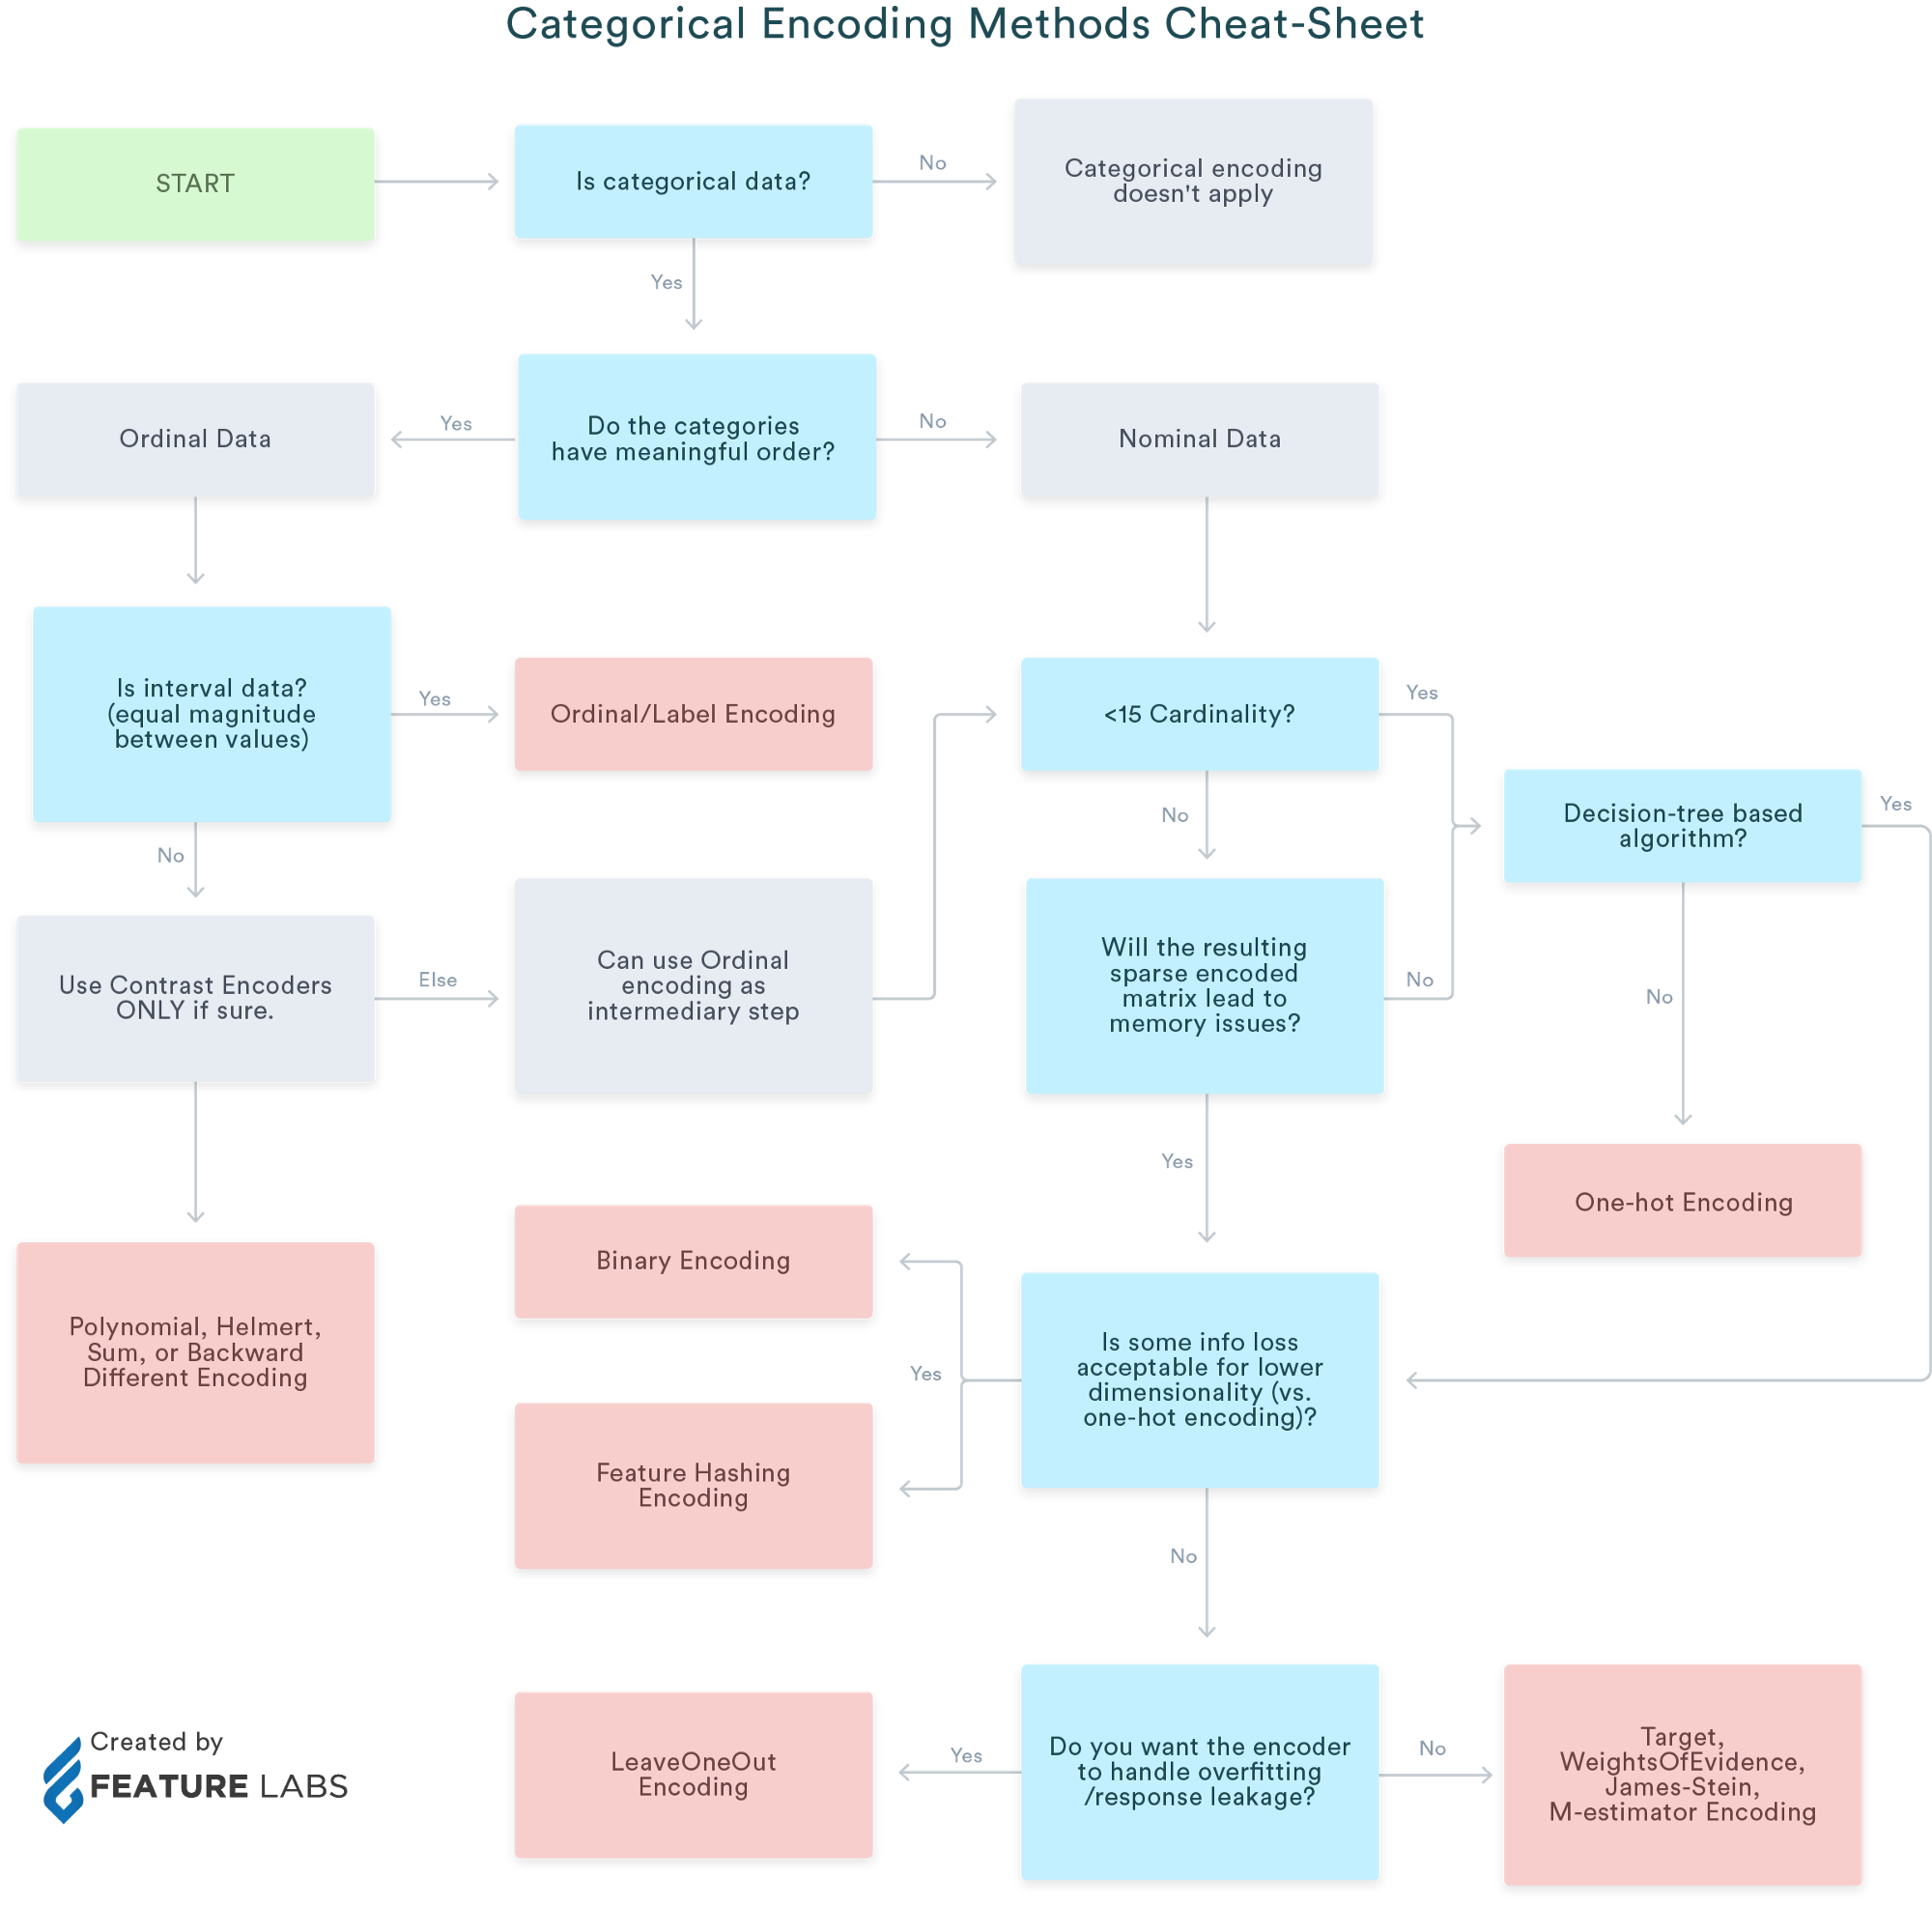

In [ ]:
## dividindo treino e teste

X_train, X_test, y_train, y_test = divide_treino(df, Target='kg_bagagem_excesso', tempo='mês', funcionario='voo', periodo='3', cliente='empresa', proporcao=0.33, seed=42, shuffle=True, series=False)

(471705, 53) (232333, 53)


In [ ]:
## encodando por james stein

lista_encode = list(df.select_dtypes('object').columns)

import category_encoders as ce
dfjs_train = pd.DataFrame()
dfjs_test = pd.DataFrame()
lista_encoder = []
for coluna in lista_encode:
    encoder = ce.JamesSteinEncoder([coluna])
    encoder = encoder.fit(X_train[coluna], y_train)

    jse_train = encoder.transform(X_train[coluna], y_train)
    dfjs_train = pd.concat([dfjs_train, jse_train], axis=1)
    dfjs_train = dfjs_train.rename(columns = {str(coluna) : str(coluna)+'_JS_encoded'})

    jse_test = encoder.transform(X_test[coluna], y_test)
    dfjs_test = pd.concat([dfjs_test, jse_test], axis=1)
    dfjs_test = dfjs_test.rename(columns = {str(coluna) : str(coluna)+'_JS_encoded'})
    
    lista_encoder.append(encoder)

X_train = pd.concat([X_train, dfjs_train], axis=1)
X_test = pd.concat([X_test, dfjs_test], axis=1)


X_train.drop(lista_encode, axis=1, inplace=True)
X_test.drop(lista_encode, axis=1, inplace=True)

print(X_train.shape, X_test.shape)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(471705, 53) (232333, 53)


In [ ]:
## Normalizando os dados

# Metodos
# 1) MinMaxScaler
# 2) StandardScaler
# 3) RobustScaler
# 4) MaxAbsScaler
# 5) PowerTranformer -> make data more Gaussian-like
# 6) QuantileTransformer -> Transform features using quantiles information

X_train_scl, X_test_scl, scl = normalizar_dados(X_train, X_test, Scaler='MinMaxScaler')

In [ ]:
X_train_scl = pd.DataFrame(X_train_scl, columns=X_train.columns)
X_test_scl = pd.DataFrame(X_test_scl, columns=X_test.columns)

In [ ]:
train = X_train_scl.merge(y_train, left_on=X_train.index, right_on=y_train.index)
test = X_test_scl.merge(y_test, left_on=X_test.index, right_on=y_test.index)

In [ ]:
dff = pd.concat([train, test], ignore_index=True).drop(['key_0'],axis=1)

In [ ]:
dff.shape

(704038, 54)

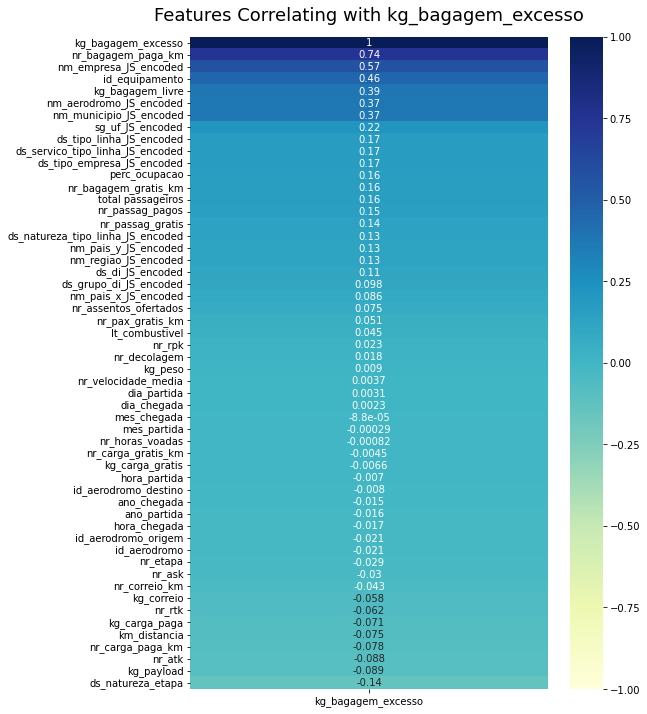

In [ ]:
## verificando a correlação linear da variáveis 
## numéricas frente a variável resposta

import matplotlib.pyplot as plt
import seaborn as sns


corrMatrix = dff.corr()
# Correlation for price
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corrMatrix[['kg_bagagem_excesso']].sort_values(by='kg_bagagem_excesso', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Features Correlating with kg_bagagem_excesso', fontdict={'fontsize':18}, pad=16);

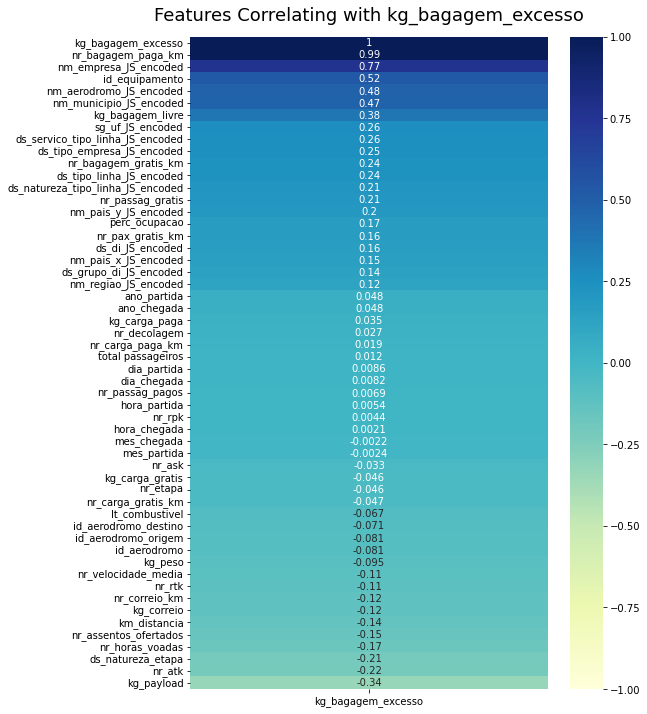

In [ ]:
## verificando a correlação não-linear da variáveis 
## numéricas frente a variável resposta

import matplotlib.pyplot as plt
import seaborn as sns

corrMatrix = dff.corr(method='spearman')
# Correlation for price
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corrMatrix[['kg_bagagem_excesso']].sort_values(by='kg_bagagem_excesso', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Features Correlating with kg_bagagem_excesso', fontdict={'fontsize':18}, pad=16);


In [ ]:
## salvando valores de correlação linear

# df_correlacao = corrMatrix[['kg_bagagem_excesso']].sort_values(by='kg_bagagem_excesso', ascending=False)
# df_correlacao.to_csv('correlacoes.csv')

In [ ]:
## removendo qualquer nulo que possa ser criado pela
## engenharia de atributos e codificação

dff.dropna(inplace=True)
dff.drop(list(df[df['perc_ocupacao'] == np.inf].index),axis=0, inplace=True)

## Selecionando variáveis

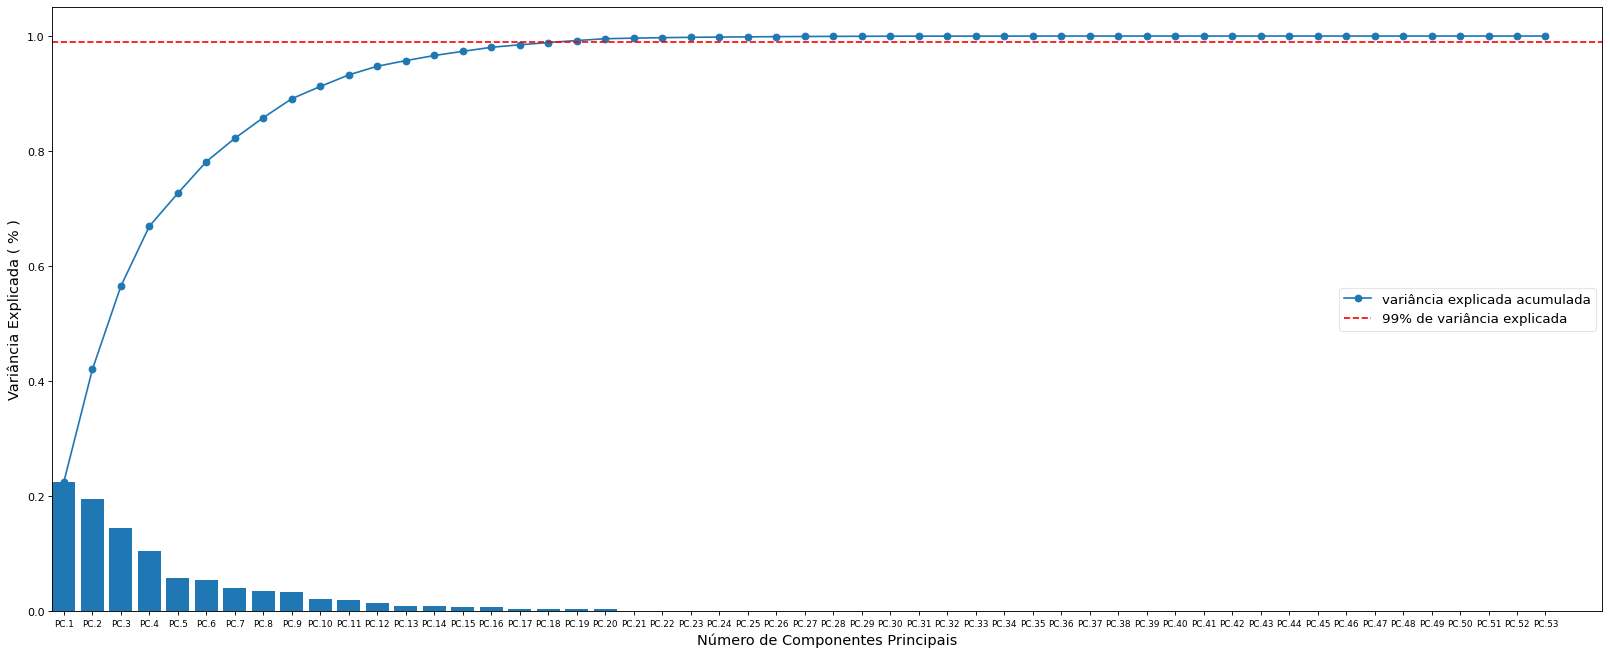

In [ ]:
## Podemos verificar o numero de variáveis 
## para explicar a variância explicada linear

from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(dff.drop(['kg_bagagem_excesso'],axis=1))
x_pca = pca.transform(dff.drop(['kg_bagagem_excesso'],axis=1))

######## PLOTAR PCA
def _plot_pca(pca):
    plt.figure(figsize=(25, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(range(pca.n_components_),np.cumsum(pca.explained_variance_ratio_), '-o', label = 'variância explicada acumulada')
    plt.bar(range(pca.n_components_),pca.explained_variance_ratio_,width = 0.8, align = 'center', tick_label = ['PC.%s' %i for i in range(1,pca.n_components_+1)])
    #plt.bar(range(pca.n_components_),np.cumsum(pca.explained_variance_ratio_)-pca.explained_variance_ratio_, bottom = pca.explained_variance_ratio_,width = 0.8, align = 'center')
    plt.tick_params(axis='x', which='major', labelsize=8)
    #plt.plot(range(pca.n_components_),np.ones([pca.n_components_])*0.95, c = 'r')
    plt.plot([-0.4,pca.n_components_+1],[0.99, 0.99], c = 'r', ls = '--', label = '99% de variância explicada')
    plt.xlim([-0.4,pca.n_components_+1])
    leg = plt.legend(loc='center right', fontsize = 12)
    leg.get_frame().set_alpha(0.5)
    plt.xlabel('Número de Componentes Principais', size = 13)
    plt.ylabel('Variância Explicada ( % )', size = 13)

pcs = PCA()
pcs.fit_transform(dff.drop(['kg_bagagem_excesso'],axis=1))
_plot_pca(pcs)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:659: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 51 iterations, i.e. alpha=2.881e-05, with an active set of 35 regressors, and the smallest cholesky piv

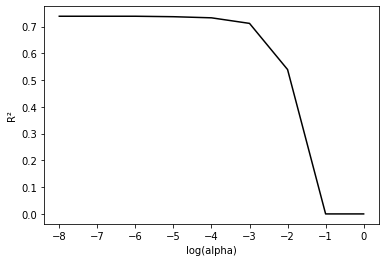

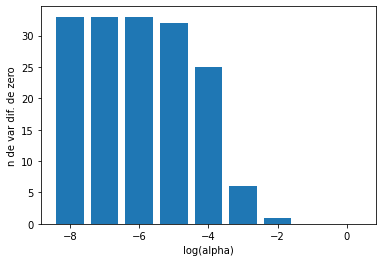

In [ ]:
## Selecionando variáveis por LassoLars
## Primeiro plotamos um gráfico de log(alpha) x r^2

from sklearn import linear_model
from sklearn.linear_model import Lasso
i=0.00000001
j=0
k=0
a=np.zeros(9)
r=np.zeros(9)
n=np.zeros(9) #número de variáveis diferentes de zero
X = dff.drop(['kg_bagagem_excesso'],axis=1).values
y=dff['kg_bagagem_excesso'].values

while i<=1.0:
  reg=linear_model.LassoLars(alpha=i)
  reg.fit(X,y)
  a[j]=i
  r[j]=reg.score(X,y)
  C=reg.coef_
  for k in range(42):
    if C[k]!=0:
      n[j]=n[j]+1
  i=i*10
  j=j+1

ev=pd.DataFrame({'alpha':a,'R2':r})

y=ev['R2']
x=np.log10(ev['alpha'])
plt.plot(x, y, 'black') 
plt.xlabel('log(alpha)')
plt.ylabel('R²')
plt.show()

plt.bar(x,n)
plt.xlabel('log(alpha)')
plt.ylabel('n de var dif. de zero')
plt.show()

In [ ]:
dff.shape

(639869, 54)

In [ ]:
## Escolhendo o alpha com maior R^2 temos as variáveis mais
## importante

X = dff.drop(['kg_bagagem_excesso'],axis=1).values
y=dff['kg_bagagem_excesso'].values
reg=linear_model.LassoLars(alpha=0.0013)
reg.fit(X,y)
VM=reg.coef_
i=0
j=0
var=np.zeros(14)
while i<53:
   if VM[i]!=0:
     var[j]=i
     j=j+1
   i=i+1
var

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


array([ 2., 10., 22., 23., 39., 41., 47.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.])

In [ ]:
list(dff.columns)

['id_aerodromo_origem',
 'nr_etapa',
 'id_equipamento',
 'id_aerodromo_destino',
 'lt_combustivel',
 'nr_assentos_ofertados',
 'kg_payload',
 'km_distancia',
 'nr_passag_pagos',
 'nr_passag_gratis',
 'kg_bagagem_livre',
 'kg_carga_paga',
 'kg_carga_gratis',
 'kg_correio',
 'nr_decolagem',
 'nr_horas_voadas',
 'kg_peso',
 'nr_velocidade_media',
 'nr_pax_gratis_km',
 'nr_carga_paga_km',
 'nr_carga_gratis_km',
 'nr_correio_km',
 'nr_bagagem_paga_km',
 'nr_bagagem_gratis_km',
 'nr_ask',
 'nr_rpk',
 'nr_atk',
 'nr_rtk',
 'id_aerodromo',
 'ds_natureza_etapa',
 'hora_chegada',
 'hora_partida',
 'dia_chegada',
 'dia_partida',
 'mes_chegada',
 'mes_partida',
 'ano_chegada',
 'ano_partida',
 'total passageiros',
 'perc_ocupacao',
 'nm_aerodromo_JS_encoded',
 'nm_municipio_JS_encoded',
 'sg_uf_JS_encoded',
 'nm_regiao_JS_encoded',
 'nm_pais_x_JS_encoded',
 'ds_di_JS_encoded',
 'ds_grupo_di_JS_encoded',
 'nm_empresa_JS_encoded',
 'nm_pais_y_JS_encoded',
 'ds_tipo_empresa_JS_encoded',
 'ds_tipo_lin

In [ ]:
## salvando o dataset

#dff.to_csv('borracharia.csv')

## Feature Importance:

In [ ]:
## dividindo treino e teste

X_train, X_test, y_train, y_test = divide_treino(dff, Target='kg_bagagem_excesso', tempo='mês', funcionario='voo', periodo='3', cliente='empresa', proporcao=0.33, seed=42, shuffle=True, series=False)

(428712, 53) (211157, 53)


[22:00:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


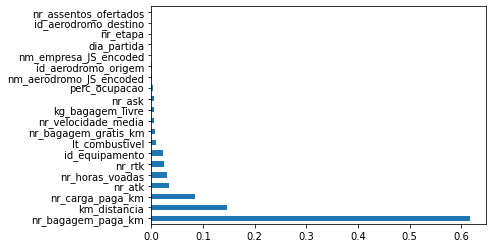

In [ ]:
# Verificando feature importance utilizando XGBoost
# (poderiamos usar qualquer modelo baseado em árvore)

model = XGBRegressor()
model.fit(X_train, y_train)

(pd.Series(model.feature_importances_, index=X_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

In [ ]:
## as variáveis foram selecionadas por lasso lars, pelas correlações de
## spearman e pela feature importance 

df_select = dff[['id_equipamento', 
                 'kg_bagagem_livre', 
                 'nr_bagagem_paga_km', 
                 'nr_bagagem_gratis_km',
                 'perc_ocupacao', 
                 'nm_municipio_JS_encoded', 
                 'kg_bagagem_excesso',
                 'ds_grupo_di_JS_encoded',
                 'nm_empresa_JS_encoded',
                 'nm_aerodromo_JS_encoded',
                 'sg_uf_JS_encoded',
                 'ds_servico_tipo_linha_JS_encoded',
                 'kg_payload',
                 'km_distancia',
                 'nr_carga_paga_km',
                 'nr_atk',
                 'nr_horas_voadas',
                 'nr_rtk',
                 'lt_combustivel'
                 ]]



In [ ]:
## salvando dados de feature importance 

dados_feature_importance = pd.DataFrame([X_train.columns,model.feature_importances_]).T
dados_feature_importance.to_csv('feature_importance.csv')

## Avaliação de modelos:

In [ ]:
## instanciando modelos

modelos = get_models(metodo='Regressao')

Defined 9 models


In [ ]:
## avaliando modelos

df_modelo = Avaliar_modelos(modelos, X_train, X_test, y_train, y_test, tipo='Regressao')

O modelo lr foi treinado e testado em 1.5239915660000065 segundos
O modelo lasso foi treinado e testado em 0.4822885989999577 segundos
O modelo ridge foi treinado e testado em 0.2661147549999896 segundos
O modelo en foi treinado e testado em 0.36338307800002667 segundos


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


O modelo huber foi treinado e testado em 26.115811878000045 segundos
O modelo pa foi treinado e testado em 6.311200655999983 segundos
O modelo sgd foi treinado e testado em 112.69508683999999 segundos
O modelo ada foi treinado e testado em 138.048415912 segundos
O modelo rf foi treinado e testado em 264.8948502669999 segundos


In [ ]:
## tabela de resultados

df_modelo.set_index('Modelo').T

Modelo,lr,lasso,ridge,en,huber,pa,sgd,ada,rf
Correlation coefficient (r2),0.870,0.571,0.863,0.583,0.651,0.833,0.733,0.895,0.963
Coefficient of determination (R2),0.756,0.318,0.741,0.187,0.359,0.673,0.531,0.687,0.927
Explained_Variance,0.756,0.318,0.741,0.187,0.375,0.688,0.531,0.760,0.927
Mean_Absolute_Error,7.719,10.794,7.953,14.236,9.836,6.919,10.475,8.734,0.054
Mean_Squared_Error,184.377,516.223,196.152,615.107,485.097,247.811,354.665,236.700,54.901
CPU time[s],1.524,0.482,0.266,0.363,26.116,6.311,112.695,138.048,264.895
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### com vairiáveis selecionadas pelo Lasso

In [ ]:
## dividindo treino e teste

X_train, X_test, y_train, y_test = divide_treino(df_select, Target='kg_bagagem_excesso', tempo='mês', funcionario='voo', periodo='3', cliente='empresa', proporcao=0.33, seed=42, shuffle=True, series=False)

(428712, 18) (211157, 18)


In [ ]:
## instanciando modelos

modelos = get_models(metodo='Regressao')

Defined 9 models


In [ ]:
## avaliando modelos

df_modelo = Avaliar_modelos(modelos, X_train, X_test, y_train, y_test, tipo='Regressao')

O modelo lr foi treinado e testado em 0.39103241199995864 segundos
O modelo lasso foi treinado e testado em 0.2209580640000013 segundos
O modelo ridge foi treinado e testado em 0.12594779999994898 segundos
O modelo en foi treinado e testado em 0.17974516100002802 segundos


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


O modelo huber foi treinado e testado em 10.233443781999995 segundos
O modelo pa foi treinado e testado em 3.0354789350000146 segundos
O modelo sgd foi treinado e testado em 85.39982975800001 segundos
O modelo ada foi treinado e testado em 66.41342146199997 segundos
O modelo rf foi treinado e testado em 130.82394606100002 segundos


In [ ]:
## tabela de resultados

df_modelo.set_index('Modelo').T

Modelo,lr,lasso,ridge,en,huber,pa,sgd,ada,rf
Correlation coefficient (r2),0.864,0.571,0.861,0.583,0.701,0.839,0.728,0.884,0.964
Coefficient of determination (R2),0.746,0.318,0.738,0.187,0.430,0.682,0.523,0.686,0.929
Explained_Variance,0.746,0.318,0.738,0.187,0.440,0.690,0.523,0.751,0.929
Mean_Absolute_Error,7.713,10.794,7.934,14.240,9.778,6.388,10.396,8.961,0.050
Mean_Squared_Error,192.342,516.223,198.194,615.217,431.298,240.530,360.660,237.598,53.565
CPU time[s],0.391,0.221,0.126,0.180,10.233,3.035,85.400,66.413,130.824
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Melhorando o modelo:



#### Removendo colinearidade:

In [ ]:
## através de análises das correlações e dos resultados de 
## feature importance e resultados do modelo podemos verificar
## que existe uma grande influencia de nr_bagagem_paga_km sobre
## a variável resposta.

dff.drop(['nr_bagagem_paga_km'], axis=1, inplace=True)

df_select.drop(['nr_bagagem_paga_km'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
## modelos com melhores resultados

#models['lr'] = LinearRegression()
#models['ada'] = AdaBoostRegressor(n_estimators=n_trees)
#models['rf'] = RandomForestRegressor(n_estimators=n_trees)


In [ ]:
## dividindo treino e teste para base total

X_train, X_test, y_train, y_test = divide_treino(dff, Target='kg_bagagem_excesso', tempo='mês', funcionario='voo', periodo='3', cliente='empresa', proporcao=0.33, seed=42, shuffle=True, series=False)

(428712, 52) (211157, 52)


In [ ]:
## Instanciando os três modelos e testando as métricas

from sklearn.pipeline import Pipeline


pipe1 = Pipeline([('lr', LinearRegression())])

n_trees=100
pipe2 = Pipeline([('ada', AdaBoostRegressor(n_estimators=n_trees))])
pipe3 = Pipeline([('rf', RandomForestRegressor(n_estimators=n_trees))])


pipe1.fit(X_train, y_train)
pipe1.score(X_test, y_test)

ypred = pipe1.predict(X_test)
pearson, _ = pearsonr(y_test,ypred)
r2 = metrics.r2_score(y_test,ypred)	
exp_var = metrics.explained_variance_score(y_test,ypred)
MAE = metrics.mean_absolute_error(y_test,ypred)
MSE = metrics.mean_squared_error(y_test,ypred)


print(pearson, r2, exp_var, MAE, MSE)

0.6906895135239943 0.47700770982324847 0.4770113064329198 11.311673360195257 395.793015994313


In [ ]:
pipe2.fit(X_train,y_train)
pipe2.score(X_test, y_test)

ypred = pipe2.predict(X_test)
pearson, _ = pearsonr(y_test,ypred)
r2 = metrics.r2_score(y_test,ypred)	
exp_var = metrics.explained_variance_score(y_test,ypred)
MAE = metrics.mean_absolute_error(y_test,ypred)
MSE = metrics.mean_squared_error(y_test,ypred)

print(pearson, r2, exp_var, MAE, MSE)

0.6047321231744762 0.2595093850233885 0.32858299753082276 13.486819676610933 560.3926086903239


In [ ]:
pipe3.fit(X_train,y_train)
pipe3.score(X_test, y_test)

ypred = pipe3.predict(X_test)
pearson, _ = pearsonr(y_test,ypred)
r2 = metrics.r2_score(y_test,ypred)	
exp_var = metrics.explained_variance_score(y_test,ypred)
MAE = metrics.mean_absolute_error(y_test,ypred)
MSE = metrics.mean_squared_error(y_test,ypred)

print(pearson, r2, exp_var, MAE, MSE)

0.7839550566868179 0.6141459985678355 0.61429370164643 6.867011796909407 292.0087386158167


#### Removendo outliers

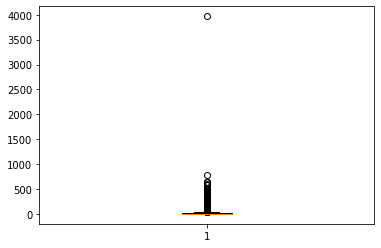

In [ ]:
## Verificando outliers da resposta
plt.boxplot(df_select['kg_bagagem_excesso']);

In [ ]:
## removendo valores superiores a 750
df_select.drop(list(df_select[df_select['kg_bagagem_excesso']>750].index), axis=0, inplace=True)
dff.drop(list(dff[dff['kg_bagagem_excesso']>750].index), axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


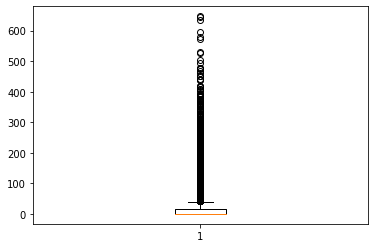

In [ ]:
## Verificando outliers da resposta
plt.boxplot(df_select['kg_bagagem_excesso']);

##### 53 variáveis:

In [ ]:
## dividindo treino e teste

X_train, X_test, y_train, y_test = divide_treino(dff, Target='kg_bagagem_excesso', tempo='mês', funcionario='voo', periodo='3', cliente='empresa', proporcao=0.33, seed=42, shuffle=True, series=False)

(428710, 52) (211157, 52)


In [ ]:
## Instanciando os três modelos e testando as métricas

from sklearn.pipeline import Pipeline


pipe1 = Pipeline([('lr', LinearRegression())])

n_trees=100
pipe2 = Pipeline([('ada', AdaBoostRegressor(n_estimators=n_trees))])
pipe3 = Pipeline([('rf', RandomForestRegressor(n_estimators=n_trees))])


pipe1.fit(X_train, y_train)
pipe1.score(X_test, y_test)

ypred = pipe1.predict(X_test)
pearson, _ = pearsonr(y_test,ypred)
r2 = metrics.r2_score(y_test,ypred)	
exp_var = metrics.explained_variance_score(y_test,ypred)
MAE = metrics.mean_absolute_error(y_test,ypred)
MSE = metrics.mean_squared_error(y_test,ypred)

print(pearson, r2, exp_var, MAE, MSE)

0.7216508293510837 0.5207668120564628 0.5207701873587371 11.3042394847199 329.26763617223537


In [ ]:
pipe2.fit(X_train,y_train)
pipe2.score(X_test, y_test)

ypred = pipe2.predict(X_test)
pearson, _ = pearsonr(y_test,ypred)
r2 = metrics.r2_score(y_test,ypred)	
exp_var = metrics.explained_variance_score(y_test,ypred)
MAE = metrics.mean_absolute_error(y_test,ypred)
MSE = metrics.mean_squared_error(y_test,ypred)

print(pearson, r2, exp_var, MAE, MSE)

0.6765307910994862 0.1131224606570147 0.42941570030787934 19.1183346445966 609.3485975101519


In [ ]:
pipe3.fit(X_train, y_train)
pipe3.score(X_test, y_test)

ypred = pipe3.predict(X_test)
pearson, _ = pearsonr(y_test,ypred)
r2 = metrics.r2_score(y_test,ypred)	
exp_var = metrics.explained_variance_score(y_test,ypred)
MAE = metrics.mean_absolute_error(y_test,ypred)
MSE = metrics.mean_squared_error(y_test,ypred)

print(pearson, r2, exp_var, MAE, MSE)

0.8260285076338716 0.681636824444037 0.6818872235969471 6.827543676032526 218.73837809402485


##### 17 variáveis:

In [ ]:
## dividindo treino e teste

X_train, X_test, y_train, y_test = divide_treino(df_select, Target='kg_bagagem_excesso', tempo='mês', funcionario='voo', periodo='3', cliente='empresa', proporcao=0.33, seed=42, shuffle=True, series=False)

(428710, 17) (211157, 17)


In [ ]:
from sklearn.pipeline import Pipeline


pipe1 = Pipeline([('lr', LinearRegression())])

n_trees=100
pipe2 = Pipeline([('ada', AdaBoostRegressor(n_estimators=n_trees))])
pipe3 = Pipeline([('rf', RandomForestRegressor(n_estimators=n_trees))])


pipe1.fit(X_train, y_train)
pipe1.score(X_test, y_test)

ypred = pipe1.predict(X_test)
pearson, _ = pearsonr(y_test,ypred)
r2 = metrics.r2_score(y_test,ypred)	
exp_var = metrics.explained_variance_score(y_test,ypred)
MAE = metrics.mean_absolute_error(y_test,ypred)
MSE = metrics.mean_squared_error(y_test,ypred)

print(pearson, r2, exp_var, MAE, MSE)

0.6926706330684198 0.47978640066415323 0.47978779459052945 11.52624734377209 357.4241235107151


In [ ]:
pipe2.fit(X_train,y_train)
pipe2.score(X_test, y_test)

ypred = pipe2.predict(X_test)
pearson, _ = pearsonr(y_test,ypred)
r2 = metrics.r2_score(y_test,ypred)	
exp_var = metrics.explained_variance_score(y_test,ypred)
MAE = metrics.mean_absolute_error(y_test,ypred)
MSE = metrics.mean_squared_error(y_test,ypred)

print(pearson, r2, exp_var, MAE, MSE)

0.7158760805096415 0.4528327209834243 0.48334631542185635 10.338283844735734 375.94323825045404


In [ ]:
pipe3.fit(X_train, y_train)
pipe3.score(X_test, y_test)

ypred = pipe3.predict(X_test)
pearson, _ = pearsonr(y_test,ypred)
r2 = metrics.r2_score(y_test,ypred)	
exp_var = metrics.explained_variance_score(y_test,ypred)
MAE = metrics.mean_absolute_error(y_test,ypred)
MSE = metrics.mean_squared_error(y_test,ypred)

print(pearson, r2, exp_var, MAE, MSE)

0.8132148103427803 0.6600423690706159 0.6602406937537523 7.044932064766973 233.5753206391453


In [ ]:
preds = pipe3.predict(X_test)

Text(0.5, 0, 'Valores Reais')

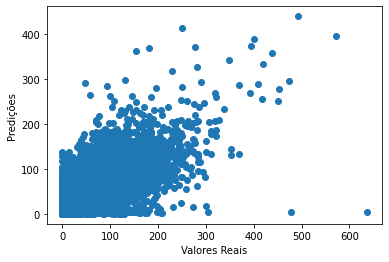

In [ ]:
## visualizando a correlação das predições e valores reais

plt.scatter(y_test,preds)
plt.ylabel('Predições')
plt.xlabel('Valores Reais')

Oportunidades de melhoria:
 - Linearizar dados com log
 - Testar outras normalizações
 - Testar outras formas de codificar
 - Tratar como serie temporal e fazer um estudo de lag das variáveis
 - Remoção mais aprofundada de outliers
 - Adicionar novas variáveis como feriados
 - Considerar transformar em um problema de classificação
